# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
%pip install citipy




Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

6624250625dad8653e36527a53a254ed


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 596
['labuhan', 'boguchany', 'sibolga', 'flinders', 'menongue', 'marawi', 'torbay', 'ushuaia', 'rikitea', 'sitka', 'taolanaro', 'praia', 'vangaindrano', 'port elizabeth', 'khatanga', 'santiago del estero', 'miranorte', 'barentsburg', 'westport', 'illoqqortoormiut', 'vysokogornyy', 'yartsevo', 'busselton', 'matagami', 'thompson', 'nouakchott', 'kodiak', 'guangyuan', 'nemuro', 'vardo', 'hobart', 'meulaboh', 'tautira', 'clyde river', 'atuona', 'saskylakh', 'marv dasht', 'esperance', 'sao jose da coroa grande', 'kaeo', 'puerto ayora', 'jiuquan', 'bethel', 'mataura', 'victoria', 'hauterive', 'cape town', 'hilo', 'luderitz', 'port lincoln', 'fortuna', 'agirish', 'nishihara', 'coruripe', 'attawapiskat', 'tuatapere', 'bengkulu', 'albany', 'iqaluit', 'talnakh', 'ngukurr', 'christchurch', 'hermanus', 'ayutla', 'bambous virieux', 'saint-joseph', 'tasiilaq', 'nanortalik', 'yellowknife', 'caravelas', 'kaitangata', 'mahebourg', 'itarema', 'bedford', 'kapaa', 'kahului', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"

print (url + "&q=San Francisco")

http://api.openweathermap.org/data/2.5/weather?units=metrics&appid=6624250625dad8653e36527a53a254ed&q=San Francisco


In [46]:
max_temp=city_max_temp = city_weather["main"]["temp_max"]-70

In [47]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"
print(url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=metrics&appid=6624250625dad8653e36527a53a254ed
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labuhan
Processing Record 2 of Set 1 | boguchany
Processing Record 3 of Set 1 | sibolga
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | menongue
Processing Record 6 of Set 1 | marawi
Processing Record 7 of Set 1 | torbay
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | praia
Processing Record 13 of Set 1 | vangaindrano
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | santiago del estero
Processing Record 17 of Set 1 | miranorte
City not found. Skipping...
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Rec

Processing Record 36 of Set 4 | severo-kurilsk
Processing Record 37 of Set 4 | sioux lookout
Processing Record 38 of Set 4 | camana
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | ravar
Processing Record 42 of Set 4 | jardim
Processing Record 43 of Set 4 | duderstadt
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | moose factory
Processing Record 46 of Set 4 | iwanai
Processing Record 47 of Set 4 | valparaiso
Processing Record 48 of Set 4 | maningrida
Processing Record 49 of Set 4 | saint-pierre
Processing Record 0 of Set 5 | tolbazy
Processing Record 1 of Set 5 | balkhash
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | bima
Processing Record 6 of Set 5 | katangli
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 

Processing Record 23 of Set 8 | garissa
Processing Record 24 of Set 8 | tilichiki
Processing Record 25 of Set 8 | aanekoski
Processing Record 26 of Set 8 | odate
Processing Record 27 of Set 8 | mus
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | mzimba
Processing Record 30 of Set 8 | mandalgovi
Processing Record 31 of Set 8 | rozkishne
Processing Record 32 of Set 8 | leshukonskoye
Processing Record 33 of Set 8 | sortland
Processing Record 34 of Set 8 | georgetown
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 8 | huarmey
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 8 | puerto escondido
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | truth or consequences
Processing Record 43 of Set 8 | verkhnyaya toyma
Processing Record 44 of Set 8 | taitung
P

Processing Record 9 of Set 12 | knysna
Processing Record 10 of Set 12 | zhigalovo
Processing Record 11 of Set 12 | alyangula
Processing Record 12 of Set 12 | celestun
Processing Record 13 of Set 12 | abidjan
Processing Record 14 of Set 12 | port hedland
Processing Record 15 of Set 12 | isilkul
Processing Record 16 of Set 12 | haradok
Processing Record 17 of Set 12 | labrea
Processing Record 18 of Set 12 | dingle
Processing Record 19 of Set 12 | omsukchan
Processing Record 20 of Set 12 | cape canaveral
Processing Record 21 of Set 12 | aflu
City not found. Skipping...
Processing Record 22 of Set 12 | yeghegnavan
Processing Record 23 of Set 12 | gornopravdinsk
Processing Record 24 of Set 12 | nara
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | falealupo
City not found. Skipping...
Processing Record 30 of Set 12 | miri
Processing Record 31

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labuhan,-6.8844,112.2051,299.12,87,97,3.60,ID,1675854349
1,boguchany,58.3814,97.4531,263.87,97,100,1.73,RU,1675854349
2,sibolga,1.7427,98.7792,300.34,78,60,1.17,ID,1675854349
3,flinders,-34.5833,150.8552,293.78,83,92,3.71,AU,1675854350
4,menongue,-14.6585,17.6910,296.87,67,97,3.18,AO,1675854350


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labuhan,-6.8844,112.2051,299.12,87,97,3.60,ID,1675854349
1,boguchany,58.3814,97.4531,263.87,97,100,1.73,RU,1675854349
2,sibolga,1.7427,98.7792,300.34,78,60,1.17,ID,1675854349
3,flinders,-34.5833,150.8552,293.78,83,92,3.71,AU,1675854350
4,menongue,-14.6585,17.6910,296.87,67,97,3.18,AO,1675854350


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

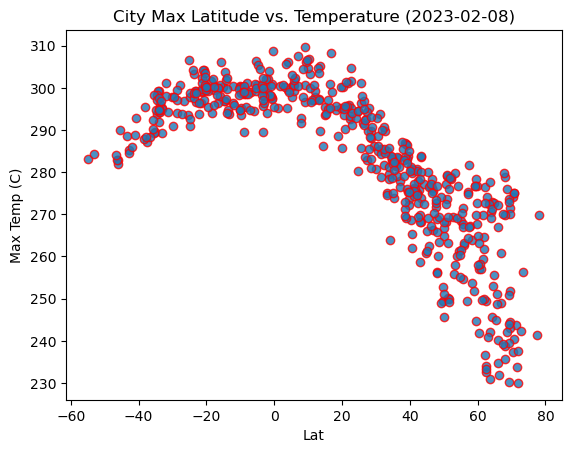

In [14]:
import time
import matplotlib.pyplot as plt


# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Lat")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

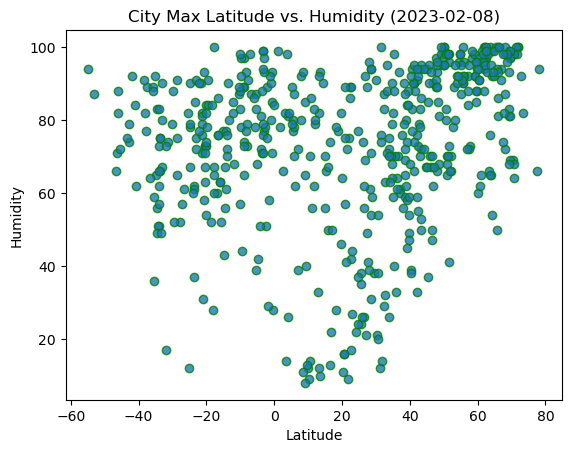

In [15]:
import time
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor= "green",
    linewidths= 1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

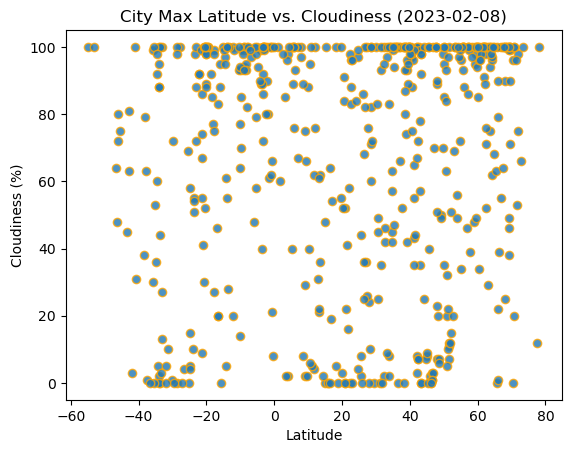

In [16]:
import time
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

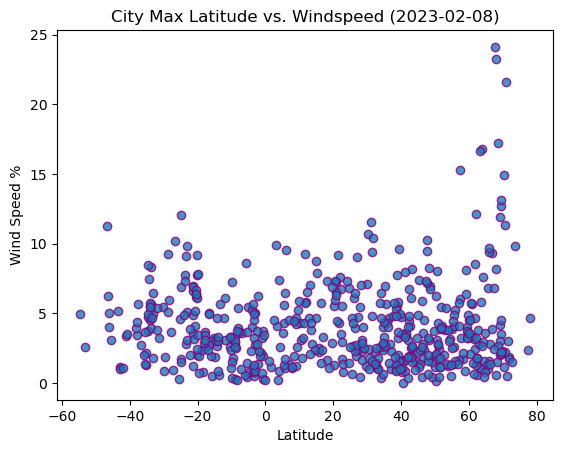

In [17]:
import time
# Build the scatter plots for latitude vs. wind speed

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Windspeed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed %")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
 # Define a function to create Linear Regression plots
 def   plot_linear_regression(x_value, y_value, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value,"r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat ")
    plt.ylabel("title")
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude > 0)
northern_hemi_df =city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,boguchany,58.3814,97.4531,263.87,97,100,1.73,RU,1675854349
2,sibolga,1.7427,98.7792,300.34,78,60,1.17,ID,1675854349
5,marawi,7.9986,124.2928,292.92,92,100,1.07,PH,1675854350
6,torbay,47.6666,-52.7314,271.74,97,100,10.29,CA,1675854351
9,sitka,57.0531,-135.3300,275.22,92,100,1.64,US,1675854352


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df =city_data_df[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labuhan,-6.8844,112.2051,299.12,87,97,3.60,ID,1675854349
3,flinders,-34.5833,150.8552,293.78,83,92,3.71,AU,1675854350
4,menongue,-14.6585,17.6910,296.87,67,97,3.18,AO,1675854350
7,ushuaia,-54.8000,-68.3000,283.11,94,100,4.91,AR,1675854150
8,rikitea,-23.1203,-134.9692,299.15,75,88,5.07,PF,1675854351


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7241750829305432


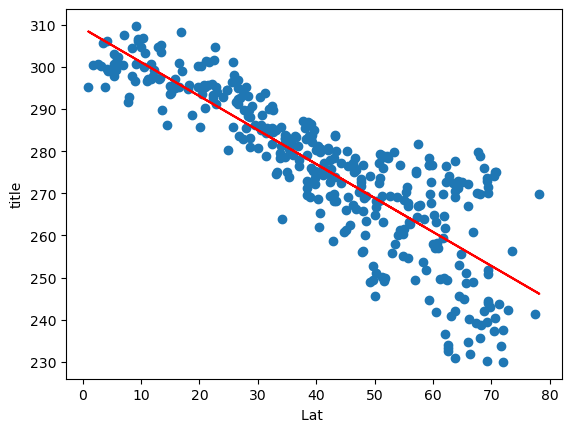

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6, -10))

The r-value is 0.3820796893916341


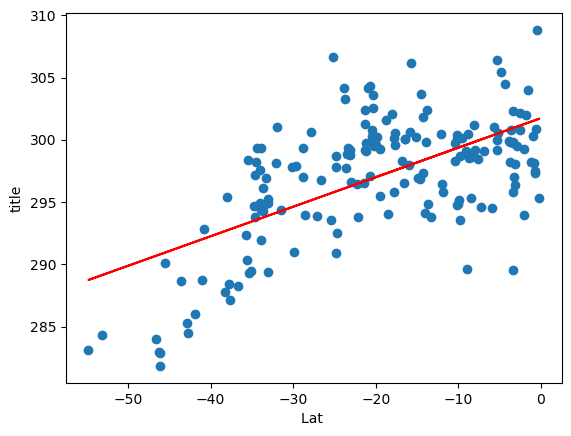

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-35,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

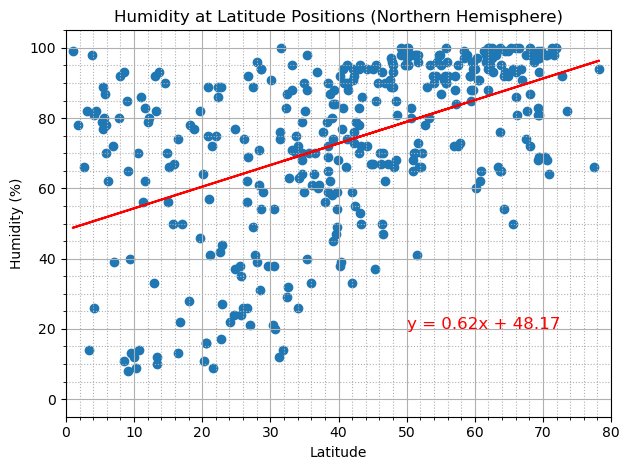

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

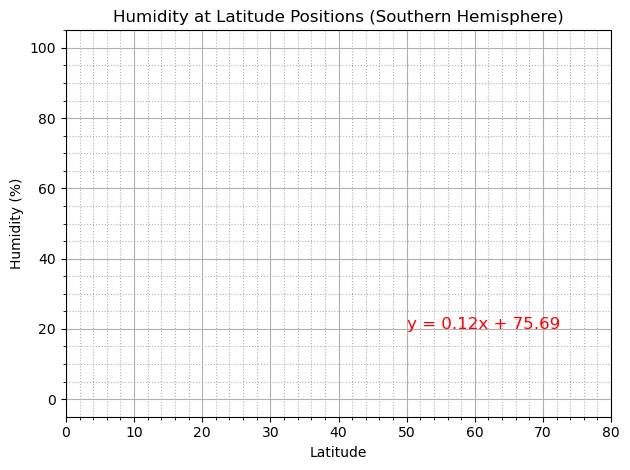

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:**There does not seem to be a very strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.


### Cloudiness vs. Latitude Linear Regression Plot

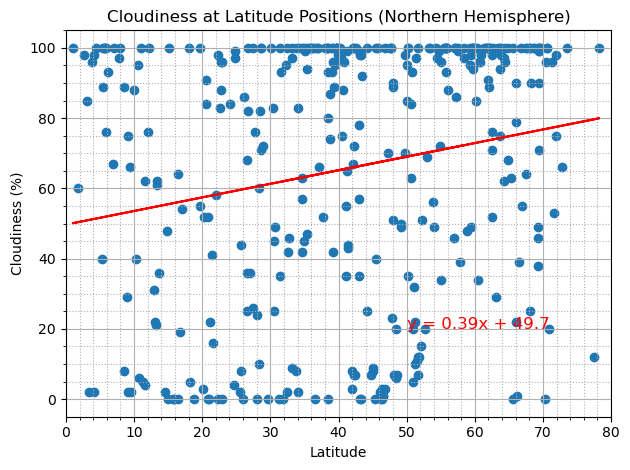

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

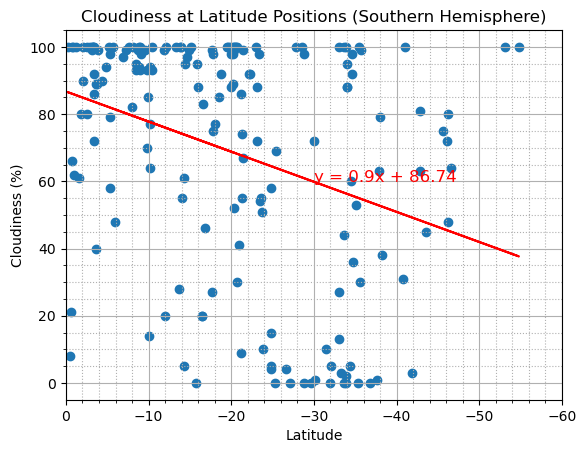

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** There does not seem to be much correlation between cloudiness and latitude when you look at the plots. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

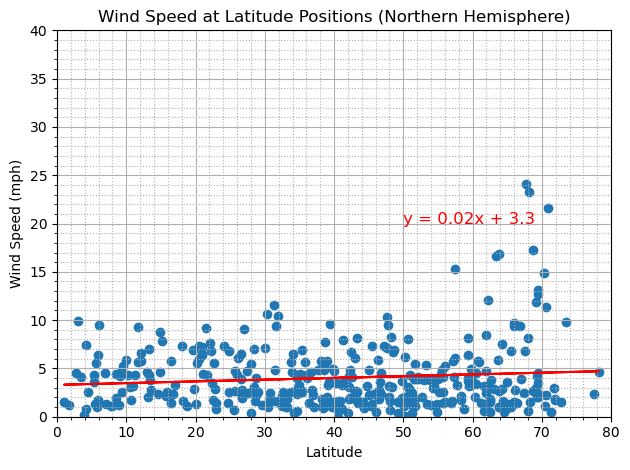

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = (x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

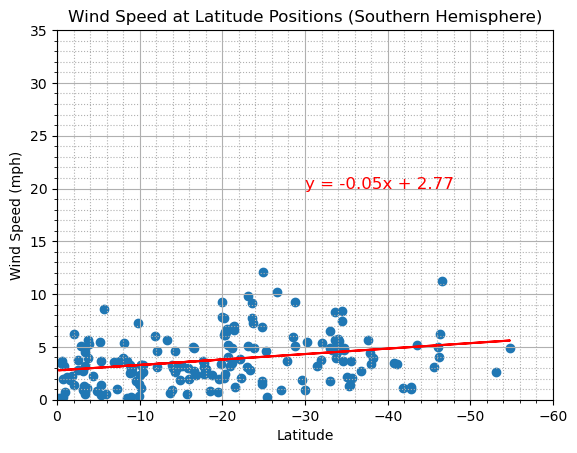

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation =(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, but the slope of the regression line is much shallower than I was expecting looking at the plots.